<a href="https://colab.research.google.com/github/N0VA-code/G2M-insight-for-Cab-Investment-firm/blob/main/G2M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
#warnings.filterwarnings('ignore')

#Data Validation

Read the Dataset

In [ ]:
Cab_Data = pd.read_csv('Cab_Data.csv')
Customer_ID = pd.read_csv('Customer_ID.csv')
Transaction_ID = pd.read_csv('Transaction_ID.csv')
City = pd.read_csv('City.csv')

Check the shape of whole dataset

In [ ]:
print("shape of Cab_Data", Cab_Data.shape)
print("shape of Customer_ID", Customer_ID.shape)
print("shape of Transaction_ID", Transaction_ID.shape)
print("shape of City", City.shape)

shape of Cab_Data (359392, 7)
shape of Customer_ID (49171, 4)
shape of Transaction_ID (440098, 3)
shape of City (20, 3)


In [ ]:
print(Cab_Data.info())
print(Customer_ID.info())
print(Transaction_ID.info())
print(City.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int6

#Data Cleaning

Modify column names

In [ ]:
for col in Cab_Data.columns:
    if ' ' in col:
        Cab_Data = Cab_Data.rename(columns={col:col.replace(' ','_')})

In [ ]:
Cab_Data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

In [ ]:
for col in Transaction_ID.columns:
    if ' ' in col:
        Transaction_ID = Transaction_ID.rename(columns={col:col.replace(' ','_')})

In [ ]:
Transaction_ID.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')

In [ ]:
for col in Customer_ID.columns:
  if ' ' in col:
    Customer_ID = Customer_ID.rename(columns={col:col.replace(' ','_')})

In [ ]:
Customer_ID.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')

In [ ]:
Cab_Data.head(3)

Transaction_ID  Date_of_Travel   Company        City  KM_Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   

   Price_Charged  Cost_of_Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632

In [ ]:
from datetime import datetime, timedelta
def to_date_format(n):
  date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%Y-%m-%d")
  date_date = datetime.strptime(date_str, "%Y-%m-%d")
  return date_date

In [ ]:
Cab_Data['Date_of_Travel'] = Cab_Data['Date_of_Travel'].apply(lambda x:to_date_format(x))

In [ ]:
Cab_Data.head(3)

Transaction_ID Date_of_Travel   Company        City  KM_Travelled  \
0        10000011     2016-01-07  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-05  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-01  Pink Cab  ATLANTA GA          9.04   

   Price_Charged  Cost_of_Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632

In [ ]:
months=[]
years=[]
for i in range(len(Cab_Data['Date_of_Travel'])):
  months.append(Cab_Data['Date_of_Travel'][i].month)
  years.append(Cab_Data['Date_of_Travel'][i].year)
Cab_Data['Month'] = months
Cab_Data['Year'] = years

Cab_Data.drop('Date_of_Travel', axis=1, inplace=True)


In [ ]:
Cab_Data.head(3)

Transaction_ID   Company        City  KM_Travelled  Price_Charged  \
0        10000011  Pink Cab  ATLANTA GA         30.45         370.95   
1        10000012  Pink Cab  ATLANTA GA         28.62         358.52   
2        10000013  Pink Cab  ATLANTA GA          9.04         125.20   

   Cost_of_Trip  Month  Year  
0       313.635      1  2016  
1       334.854      1  2016  
2        97.632      1  2016

#Data Visualization

In [ ]:
PinkCab = Cab_Data[Cab_Data['Company']=='Pink Cab']
YellowCab = Cab_Data[Cab_Data['Company']=='Yellow Cab']

In [ ]:
print("Shape of PinkCab: ",PinkCab.shape)
print("Shape of YellowCab: ",YellowCab.shape)

Shape of PinkCab:  (84711, 8)
Shape of YellowCab:  (274681, 8)


In [ ]:
Cab_Data.head(10)

Transaction_ID   Company        City  KM_Travelled  Price_Charged  \
0        10000011  Pink Cab  ATLANTA GA         30.45         370.95   
1        10000012  Pink Cab  ATLANTA GA         28.62         358.52   
2        10000013  Pink Cab  ATLANTA GA          9.04         125.20   
3        10000014  Pink Cab  ATLANTA GA         33.17         377.40   
4        10000015  Pink Cab  ATLANTA GA          8.73         114.62   
5        10000016  Pink Cab  ATLANTA GA          6.06          72.43   
6        10000017  Pink Cab   AUSTIN TX         44.00         576.15   
7        10000018  Pink Cab   AUSTIN TX         35.65         466.10   
8        10000019  Pink Cab   BOSTON MA         14.40         191.61   
9        10000020  Pink Cab   BOSTON MA         10.89         156.98   

   Cost_of_Trip  Month  Year  
0       313.635      1  2016  
1       334.854      1  2016  
2        97.632      1  2016  
3       351.602      1  2016  
4        97.776      1  2016  
5        63.024      1  2016  
6       475.200      1  2016  
7       377.890      1  2016  
8       146.880      1  2016  
9       113.256      1  2016

In [ ]:
plotP = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plotP

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction_ID, dtype: int64

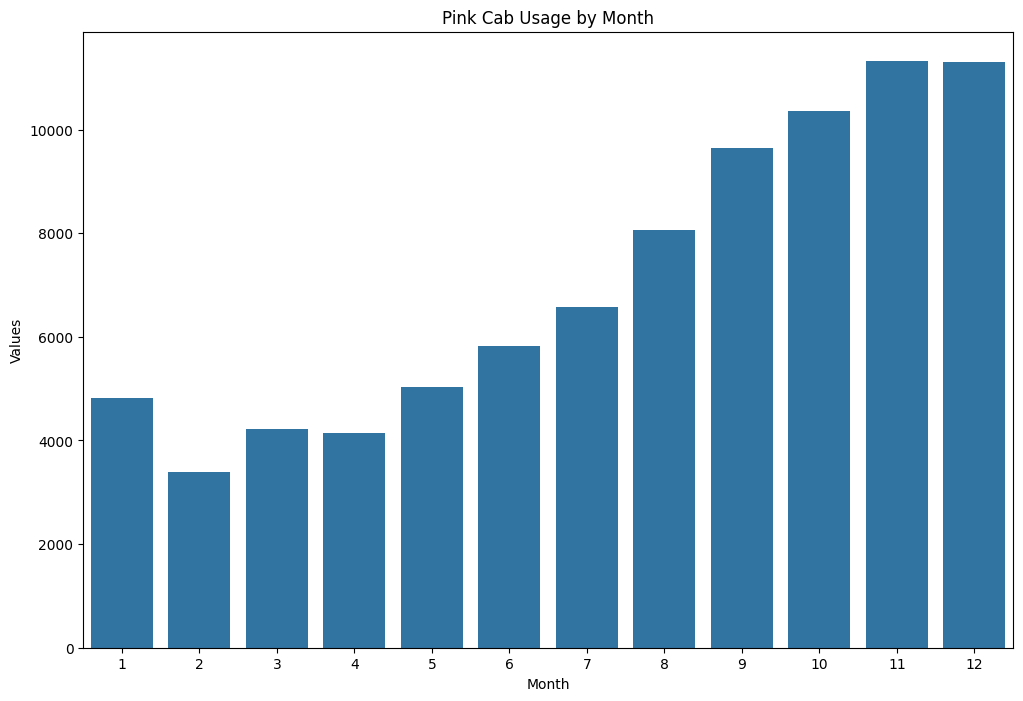

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=plotP.index,y=plotP.values)
plt.title('Pink Cab Usage by Month')
plt.xlabel('Month')
plt.ylabel('Values')
plt.show()

In [ ]:
plotY = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plotY

Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction_ID, dtype: int64

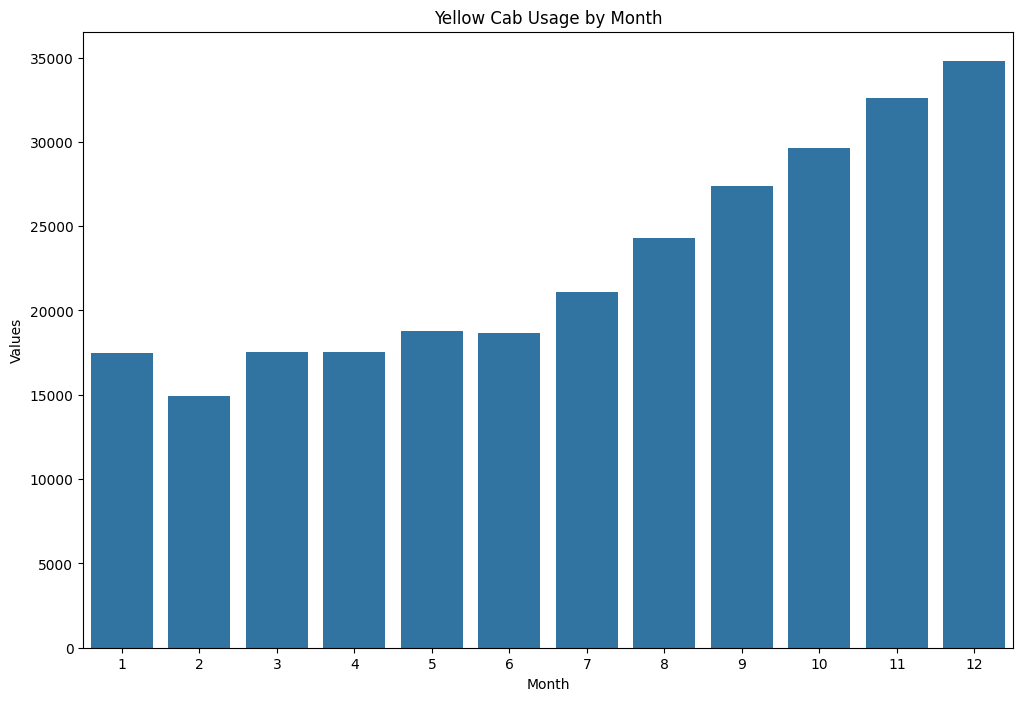

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=plotY.index,y=plotY.values)
plt.title('Yellow Cab Usage by Month')
plt.xlabel('Month')
plt.ylabel('Values')
plt.show()

>As the end of the year approaches, usage tends to increase.

In [ ]:
PinkCab_distance = PinkCab['KM_Travelled'].describe()
YellowCab_distance = YellowCab['KM_Travelled'].describe()
overall_distance = pd.concat([PinkCab['KM_Travelled'], YellowCab['KM_Travelled']]).describe()

In [ ]:
df = pd.DataFrame({'Overall': overall_distance.values,
                  'PinkCab': PinkCab_distance.values,
                  'YellowCab': YellowCab_distance.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df

Overall       PinkCab      YellowCab
Count      359392.000000  84711.000000  274681.000000
Mean           22.567254     22.559917      22.569517
Std. Dev.      12.233526     12.231092      12.234298
Min             1.900000      1.900000       1.900000
25%            12.000000     12.000000      11.990000
50%            22.440000     22.440000      22.440000
75%            32.960000     32.960000      32.960000
Max            48.000000     48.000000      48.000000

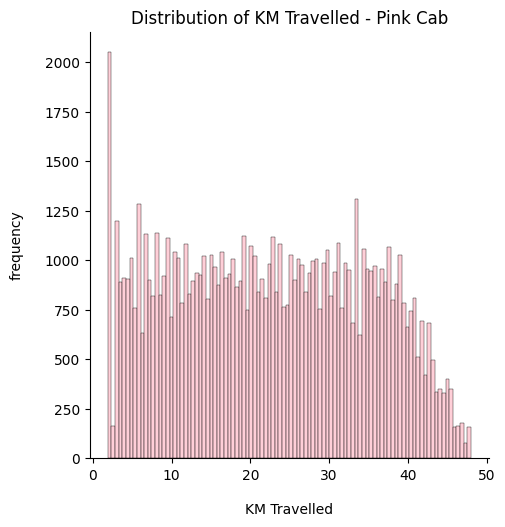

In [ ]:
sns.displot(PinkCab['KM_Travelled'], kde=False, color='pink', bins = 100)
plt.title("Distribution of KM Travelled - Pink Cab")
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

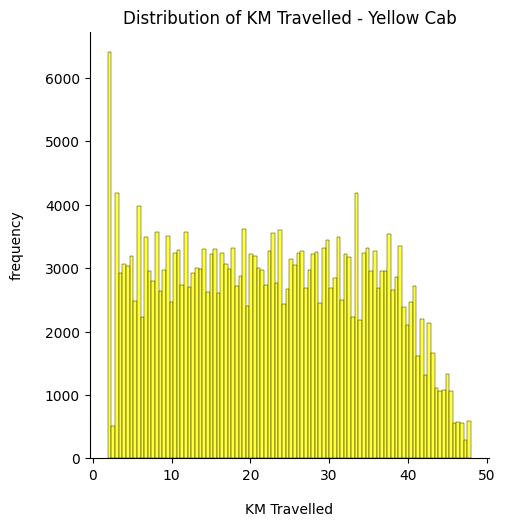

In [ ]:
sns.displot(YellowCab['KM_Travelled'], kde=False, color='yellow', bins = 100)
plt.title("Distribution of KM Travelled - Yellow Cab")
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

> From the above two graphs, We can estimate that most of the rides are in the range of 2 to 46KM

Outliers

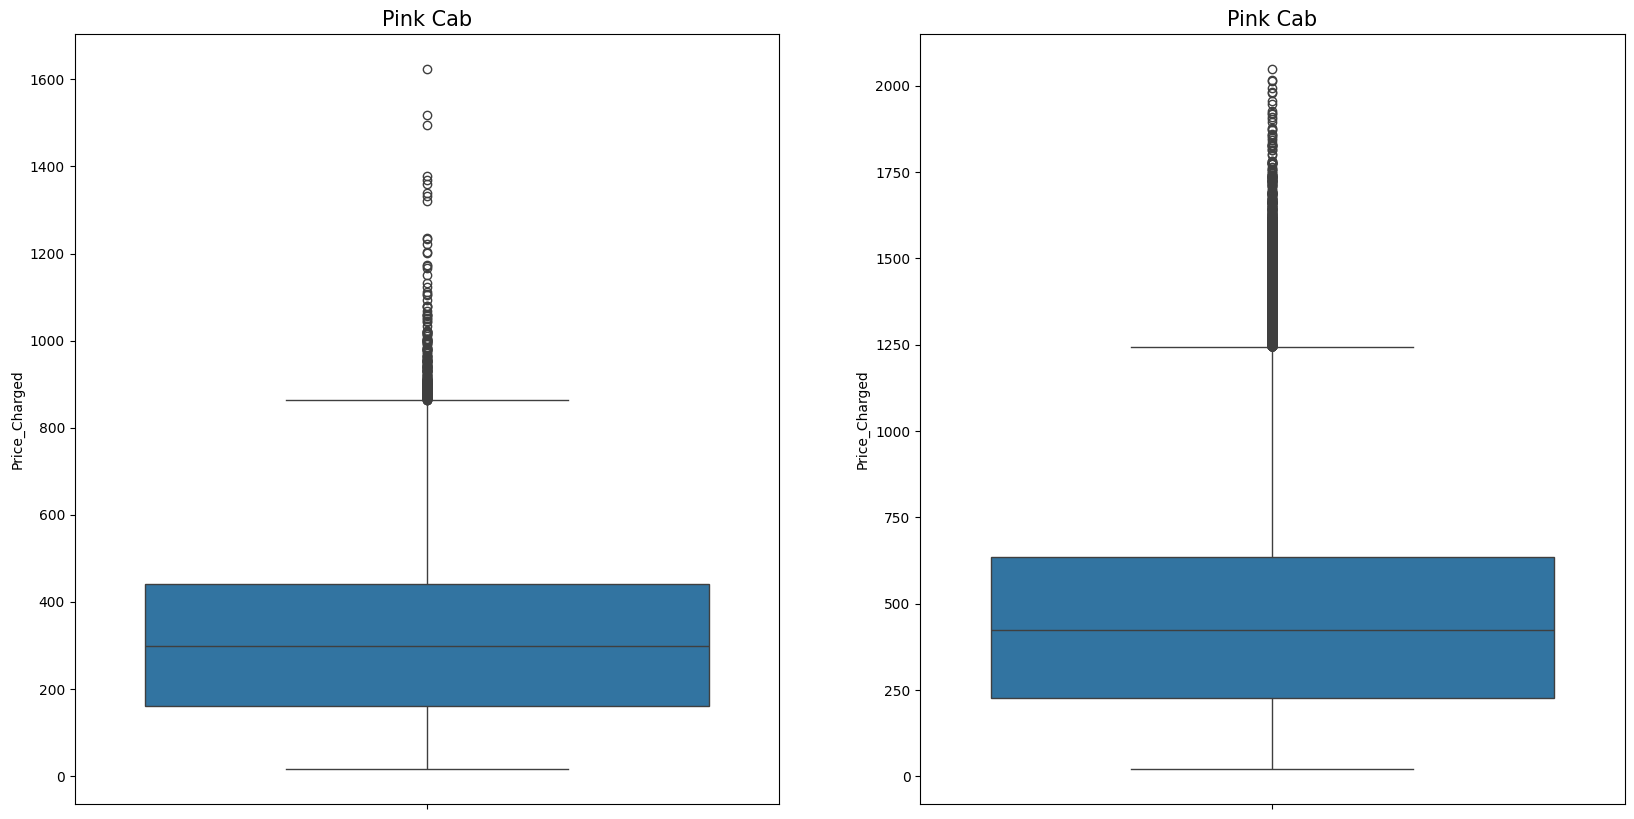

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Pink Cab', fontsize = 15)
sns.boxplot(YellowCab['Price_Charged'],ax=ax2)
ax2.set_title('Pink Cab', fontsize = 15)
plt.show()

Outliers

>These outliers (more than 1.5 IQR) are due to use of high-end cars so decided not to remove it.

>The pirce charge range for Yellow cab is more than the pink cab.

>Yellow cab is mostly more expensive than Pink cab.

<ipython-input-29-f2ec97b39092>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
<ipython-input-29-f2ec97b39092>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation=0,fontsize=15)


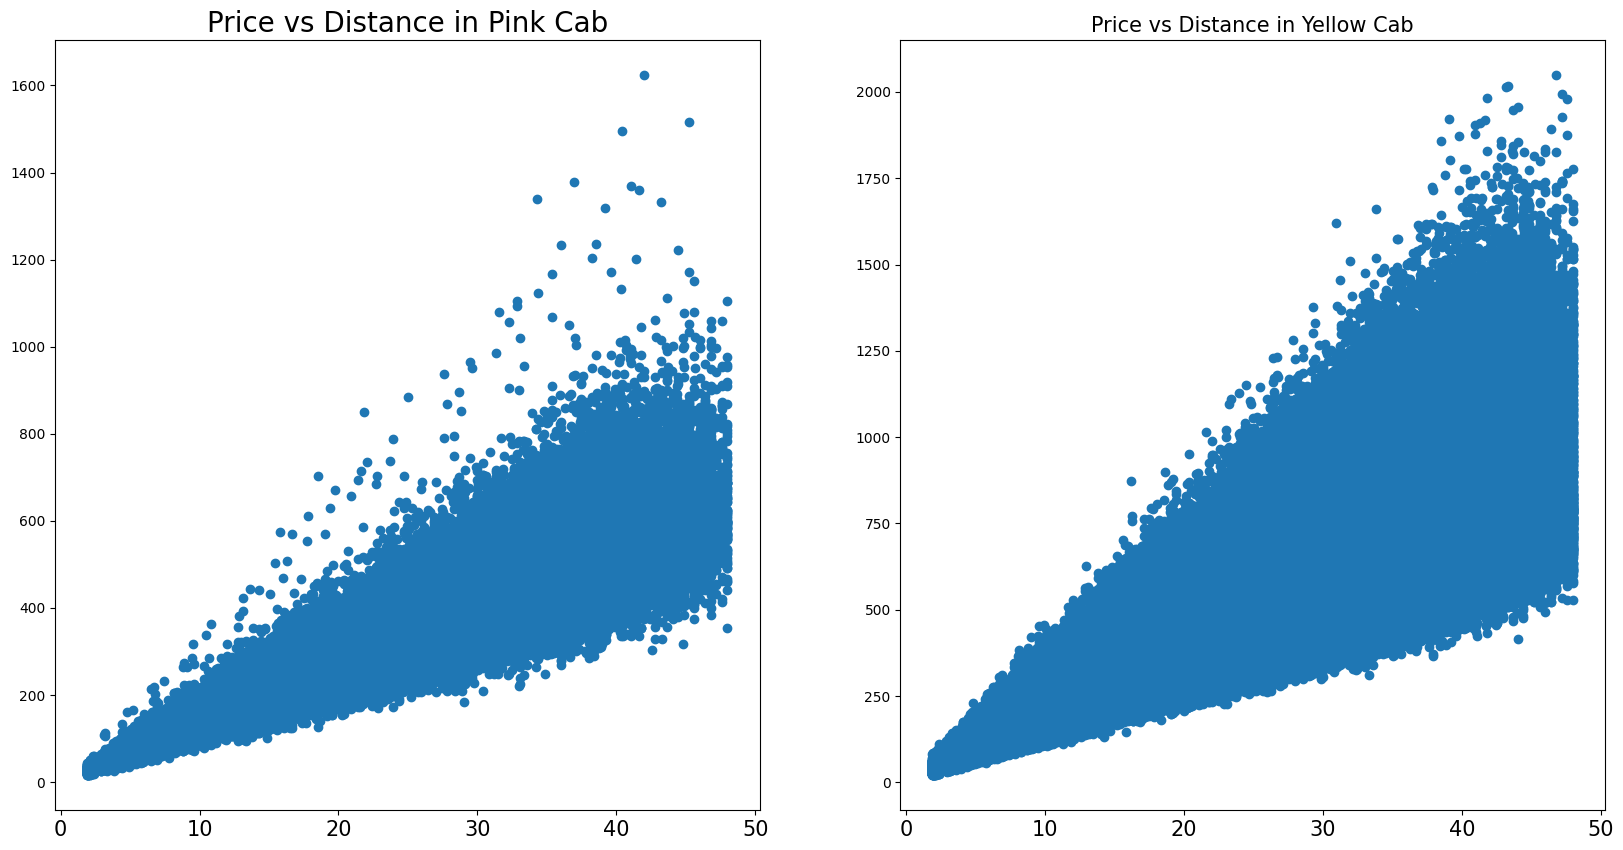

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize = (20,10))
ax1.scatter(PinkCab['KM_Travelled'], PinkCab['Price_Charged'])
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)

ax2.scatter(YellowCab['KM_Travelled'], YellowCab['Price_Charged'])
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=15)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=0,fontsize=15)

plt.show()

In [ ]:
PinkCab['Price_Charged'].corr(PinkCab['KM_Travelled'])

0.9277652782594855

In [ ]:
YellowCab['Price_Charged'].corr(YellowCab['KM_Travelled'])

0.8597086294478491

>Since correlation parameter is close to +1, Distance is one of the important factors for price of the ride.


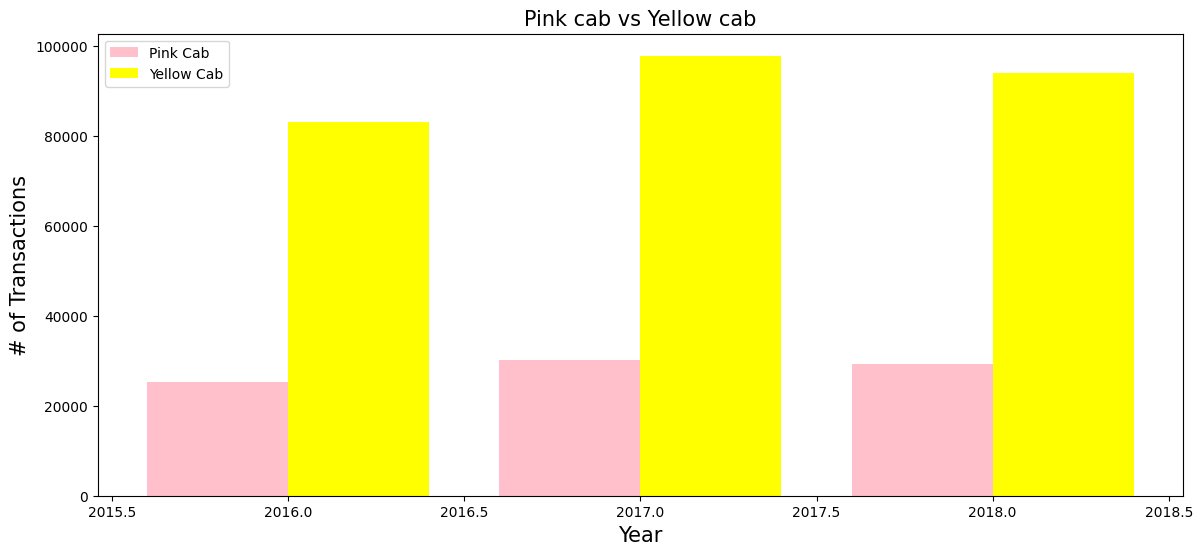

In [ ]:
plot1 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot2 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot()
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('# of Transactions',fontsize = 15)
plt.legend()
plt.show()

>Yellow Cab's usage is higher than Pink Cab

Pink Cab

In [ ]:
Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()

Year
2016    315.850071
2017    315.535059
2018    301.538134
Name: Price_Charged, dtype: float64

In [ ]:
Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016    247.039209
2017    248.820917
2018    248.413839
Name: Cost_of_Trip, dtype: float64

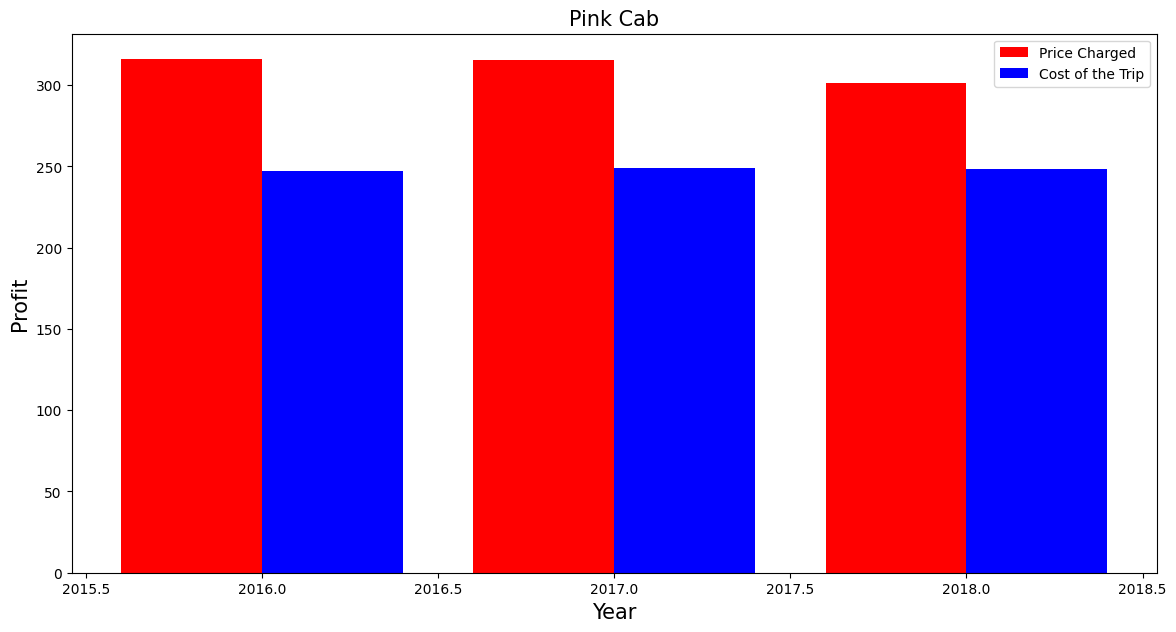

In [ ]:
plot3 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,7))
ax = plt.subplot()
ax.bar(plot1.index-0.2,plot3.values, width=0.4, color='red', align='center',label='Price Charged')
ax.bar(plot1.index+0.2,plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
plt.title('Pink Cab', fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.legend()
plt.show()


Yellow Cab

In [ ]:
Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()

Year
2016    468.230462
2017    466.278438
2018    440.893159
Name: Price_Charged, dtype: float64

In [ ]:
Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016    298.536761
2017    297.861544
2018    297.442400
Name: Cost_of_Trip, dtype: float64

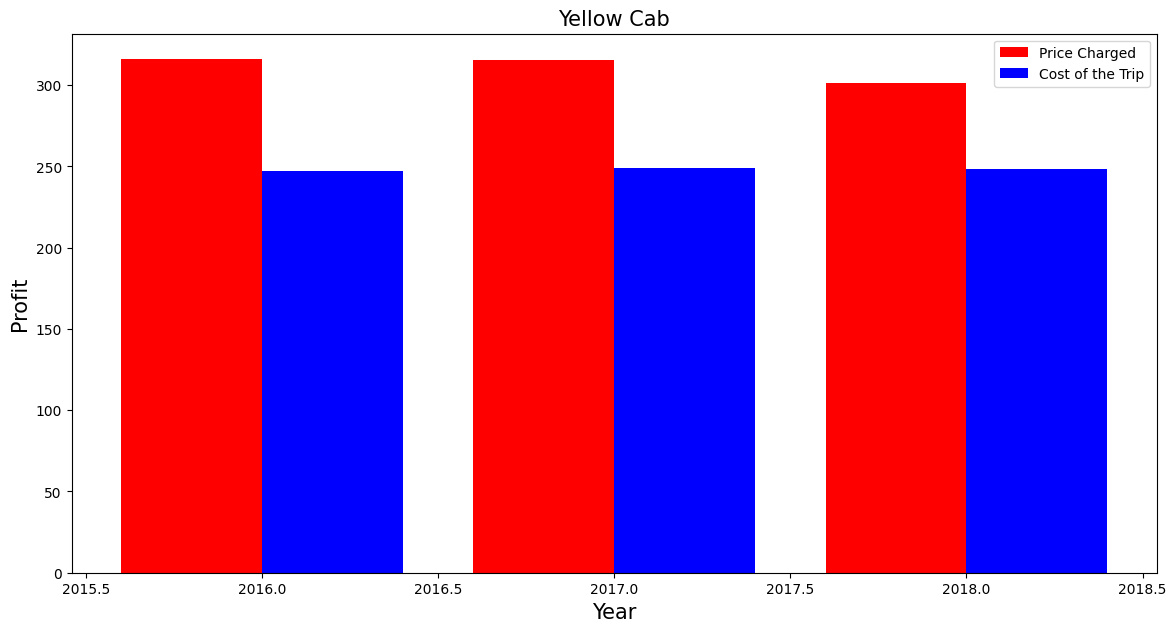

In [ ]:
plot5 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot6 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,7))
ax = plt.subplot()
ax.bar(plot1.index-0.2, plot3.values, width=0.4, color='red',align='center',label='Price Charged')
ax.bar(plot2.index+0.2, plot4.values, width=0.4, color='blue',align='center',label='Cost of the Trip')
plt.title('Yellow Cab', fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Profit',fontsize=15)
plt.legend()
plt.show()

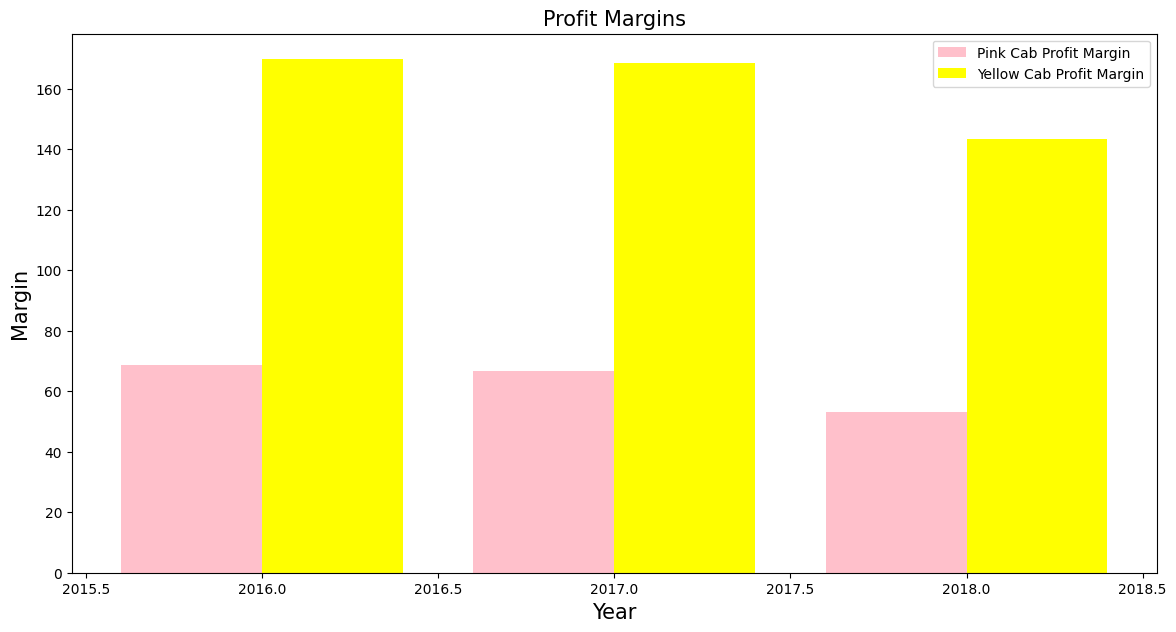

In [ ]:
plotP = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').apply(lambda x: x['Price_Charged'].mean() - x['Cost_of_Trip'].mean())
plotY = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').apply(lambda x: x['Price_Charged'].mean() - x['Cost_of_Trip'].mean())
plt.figure(figsize=(14,7))
ax=plt.subplot()
ax.bar(plotP.index-0.2,plotP.values,width=0.4,color='pink',align='center',label='Pink Cab Profit Margin')
ax.bar(plotY.index+0.2,plotY.values,width=0.4,color='yellow',align='center',label='Yellow Cab Profit Margin')
plt.title('Profit Margins',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Margin',fontsize=15)
plt.legend()
plt.show()


>Yellow Cab has higher Profit Margin (Priced Charged - Cost of Trip) compared to Pink Cab

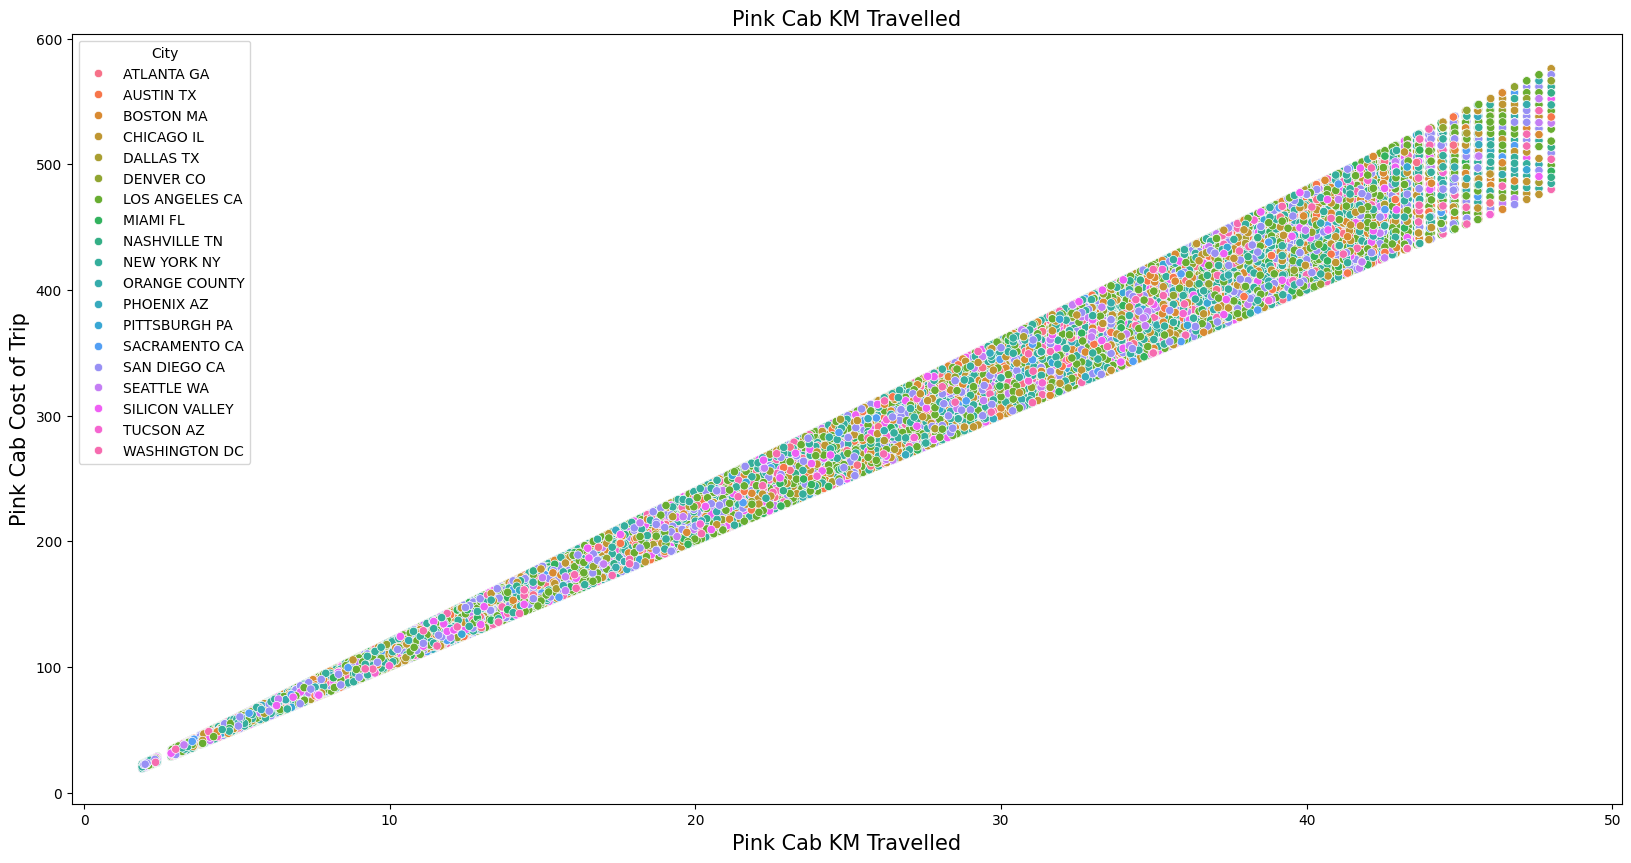

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=PinkCab['KM_Travelled'], y=PinkCab['Cost_of_Trip'],hue="City")
plt.title('Pink Cab KM Travelled',fontsize=15)
plt.xlabel('Pink Cab KM Travelled',fontsize=15)
plt.ylabel('Pink Cab Cost of Trip', fontsize=15)
plt.show()

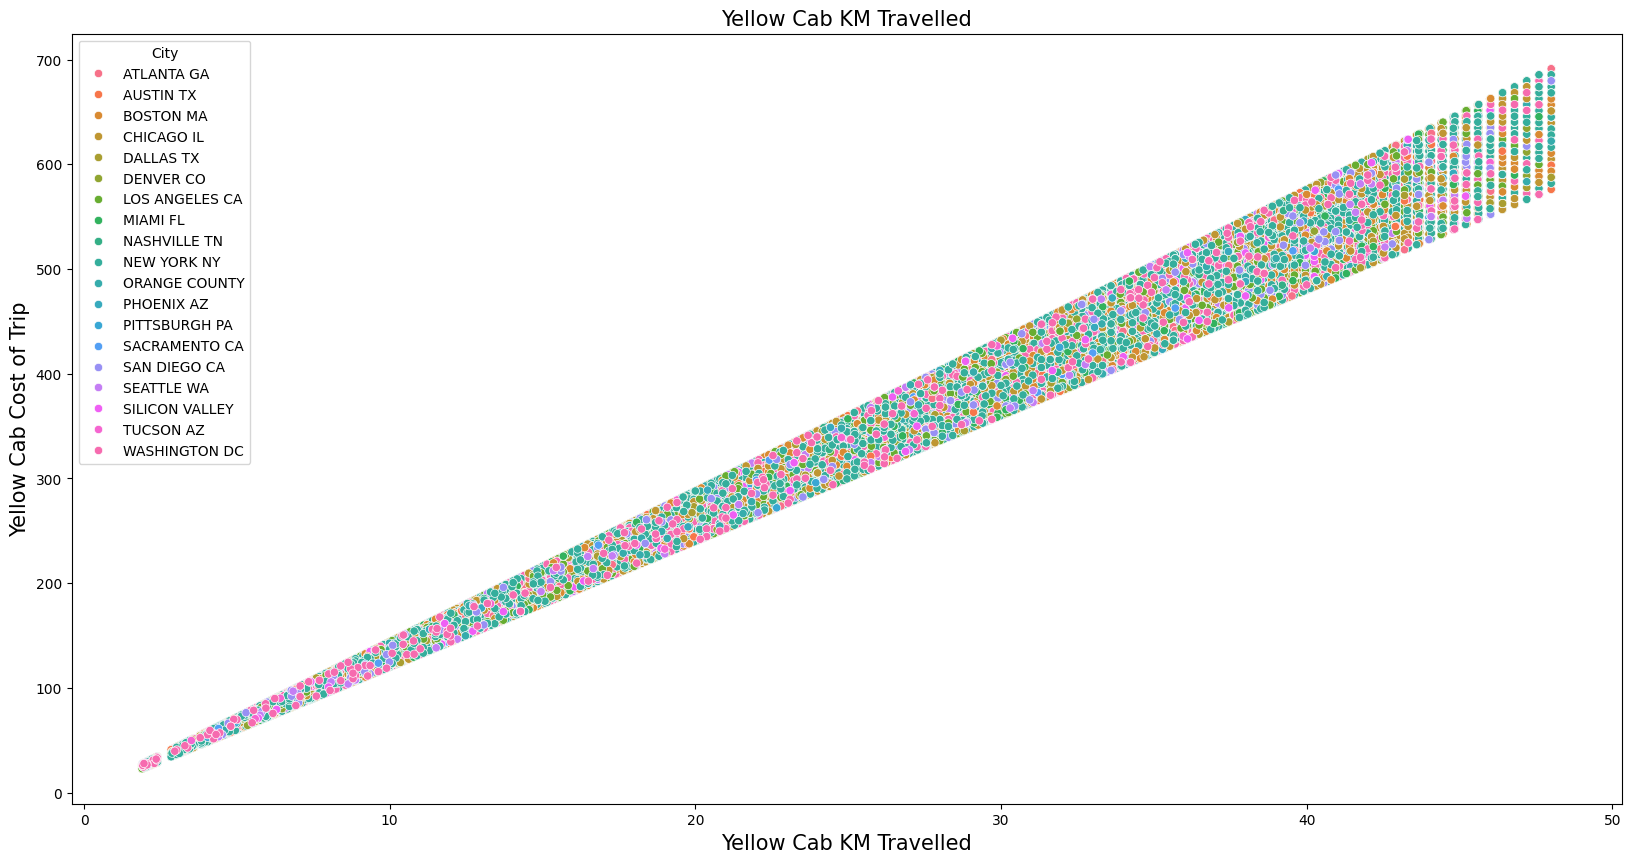

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=YellowCab['KM_Travelled'], y=YellowCab['Cost_of_Trip'],hue="City")
plt.title('Yellow Cab KM Travelled',fontsize=15)
plt.xlabel('Yellow Cab KM Travelled',fontsize=15)
plt.ylabel('Yellow Cab Cost of Trip', fontsize=15)
plt.show()

The Cost of trip for both Pink Cab and Yellow Cab are mostly same

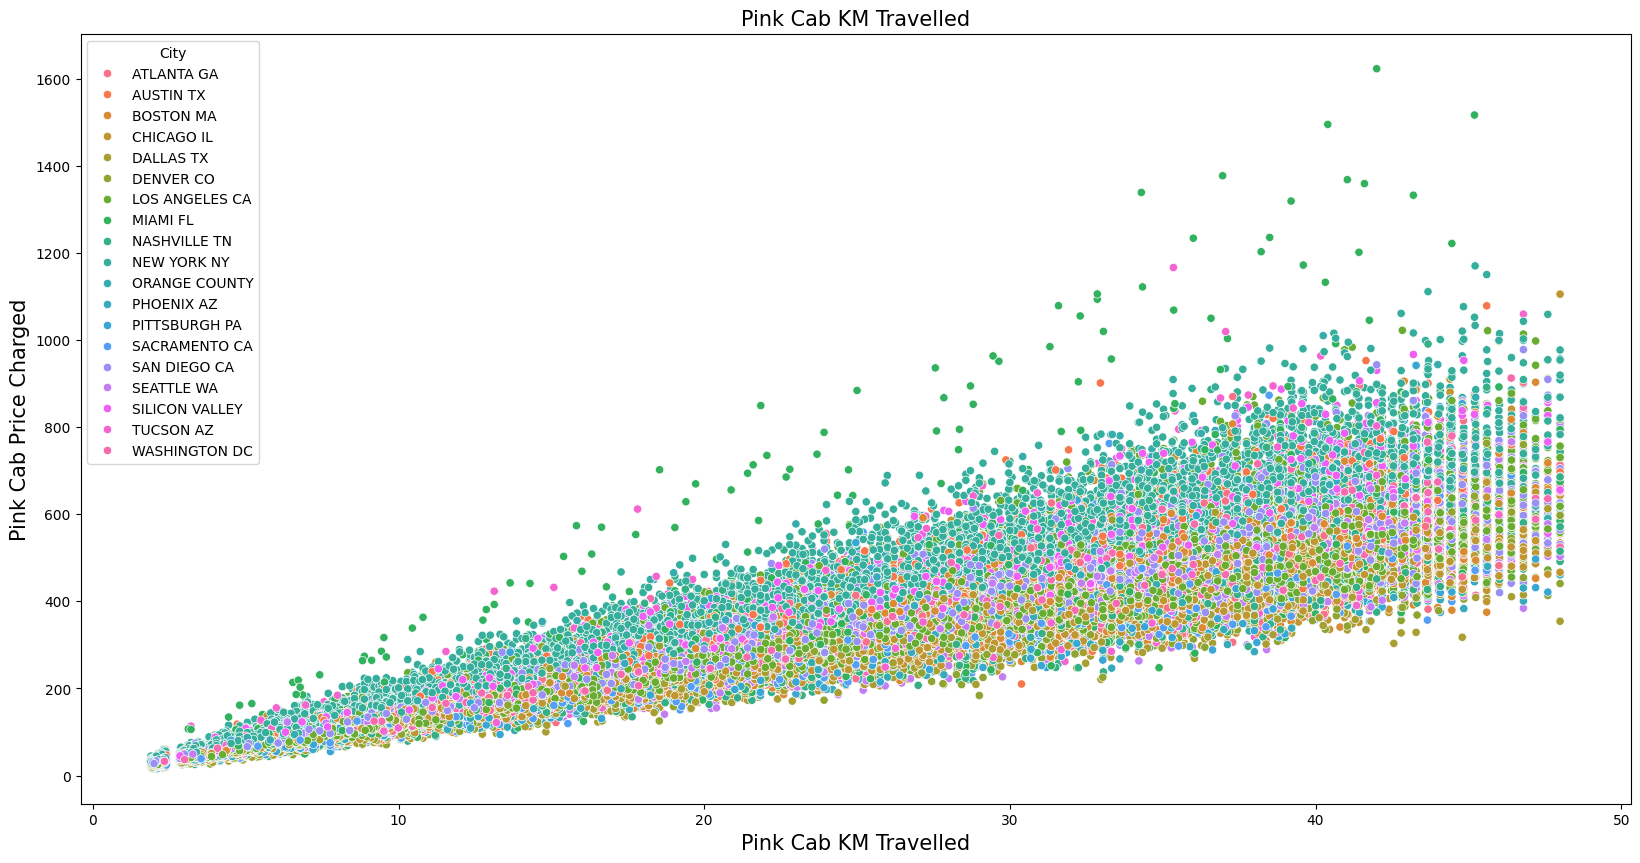

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=PinkCab['KM_Travelled'], y=PinkCab['Price_Charged'],hue="City")
plt.title('Pink Cab KM Travelled',fontsize=15)
plt.xlabel('Pink Cab KM Travelled',fontsize=15)
plt.ylabel('Pink Cab Price Charged', fontsize=15)
plt.show()

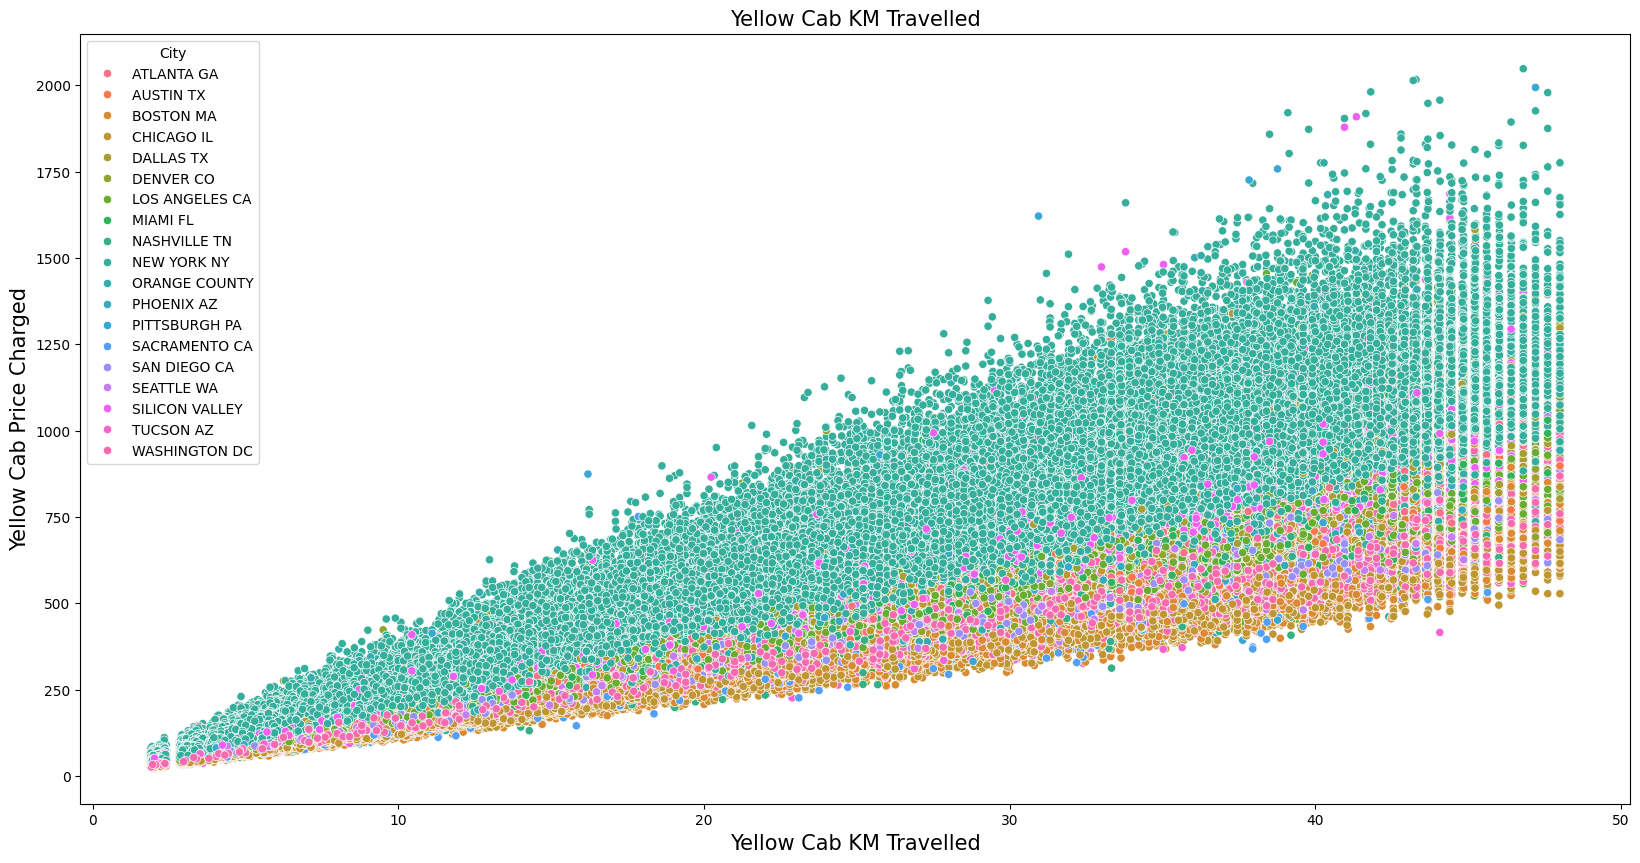

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=YellowCab['KM_Travelled'], y=YellowCab['Price_Charged'],hue="City")
plt.title('Yellow Cab KM Travelled',fontsize=15)
plt.xlabel('Yellow Cab KM Travelled',fontsize=15)
plt.ylabel('Yellow Cab Price Charged', fontsize=15)
plt.show()

>New York City the Yellow Cab price charged is more than other cities

#Joining the Data(Creating Master Data)

In [ ]:
left = Cab_Data.set_index(['Transaction_ID'])
right = Transaction_ID.set_index(['Transaction_ID'])
data = left.join(right)
data.head()

Company        City  KM_Travelled  Price_Charged  \
Transaction_ID                                                      
10000011        Pink Cab  ATLANTA GA         30.45         370.95   
10000012        Pink Cab  ATLANTA GA         28.62         358.52   
10000013        Pink Cab  ATLANTA GA          9.04         125.20   
10000014        Pink Cab  ATLANTA GA         33.17         377.40   
10000015        Pink Cab  ATLANTA GA          8.73         114.62   

                Cost_of_Trip  Month  Year  Customer_ID Payment_Mode  
Transaction_ID                                                       
10000011             313.635      1  2016        29290         Card  
10000012             334.854      1  2016        27703         Card  
10000013              97.632      1  2016        28712         Cash  
10000014             351.602      1  2016        28020         Cash  
10000015              97.776      1  2016        27182         Card

In [ ]:
left = data.set_index([data.index,'Customer_ID'])
right = Customer_ID.set_index(['Customer_ID'])
data = left.join(right)
data.head()

Company        City  KM_Travelled  Price_Charged  \
Transaction_ID Customer_ID                                                      
10000011       29290        Pink Cab  ATLANTA GA         30.45         370.95   
10000012       27703        Pink Cab  ATLANTA GA         28.62         358.52   
10000013       28712        Pink Cab  ATLANTA GA          9.04         125.20   
10000014       28020        Pink Cab  ATLANTA GA         33.17         377.40   
10000015       27182        Pink Cab  ATLANTA GA          8.73         114.62   

                            Cost_of_Trip  Month  Year Payment_Mode Gender  \
Transaction_ID Customer_ID                                                  
10000011       29290             313.635      1  2016         Card   Male   
10000012       27703             334.854      1  2016         Card   Male   
10000013       28712              97.632      1  2016         Cash   Male   
10000014       28020             351.602      1  2016         Cash   Male   
10000015       27182              97.776      1  2016         Card   Male   

                            Age  Income_(USD/Month)  
Transaction_ID Customer_ID                           
10000011       29290         28               10813  
10000012       27703         27                9237  
10000013       28712         53               11242  
10000014       28020         23               23327  
10000015       27182         33                8536

In [ ]:
left = data.set_index([data.index,'City'])
right = City.set_index(['City'])
data = left.join(right)
data.head()

Company  KM_Travelled  Price_Charged  \
Transaction_ID Customer_ID City                                                
10000011       29290       ATLANTA GA  Pink Cab         30.45         370.95   
10000012       27703       ATLANTA GA  Pink Cab         28.62         358.52   
10000013       28712       ATLANTA GA  Pink Cab          9.04         125.20   
10000014       28020       ATLANTA GA  Pink Cab         33.17         377.40   
10000015       27182       ATLANTA GA  Pink Cab          8.73         114.62   

                                       Cost_of_Trip  Month  Year Payment_Mode  \
Transaction_ID Customer_ID City                                                 
10000011       29290       ATLANTA GA       313.635      1  2016         Card   
10000012       27703       ATLANTA GA       334.854      1  2016         Card   
10000013       28712       ATLANTA GA        97.632      1  2016         Cash   
10000014       28020       ATLANTA GA       351.602      1  2016         Cash   
10000015       27182       ATLANTA GA        97.776      1  2016         Card   

                                      Gender  Age  Income_(USD/Month)  \
Transaction_ID Customer_ID City                                         
10000011       29290       ATLANTA GA   Male   28               10813   
10000012       27703       ATLANTA GA   Male   27                9237   
10000013       28712       ATLANTA GA   Male   53               11242   
10000014       28020       ATLANTA GA   Male   23               23327   
10000015       27182       ATLANTA GA   Male   33                8536   

                                      Population     Users  
Transaction_ID Customer_ID City                             
10000011       29290       ATLANTA GA   814,885    24,701   
10000012       27703       ATLANTA GA   814,885    24,701   
10000013       28712       ATLANTA GA   814,885    24,701   
10000014       28020       ATLANTA GA   814,885    24,701   
10000015       27182       ATLANTA GA   814,885    24,701

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 359392 entries, (10000011, 29290, 'ATLANTA GA') to (10440107, 52917, 'WASHINGTON DC')
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Company             359392 non-null  object 
 1   KM_Travelled        359392 non-null  float64
 2   Price_Charged       359392 non-null  float64
 3   Cost_of_Trip        359392 non-null  float64
 4   Month               359392 non-null  int64  
 5   Year                359392 non-null  int64  
 6   Payment_Mode        359392 non-null  object 
 7   Gender              359392 non-null  object 
 8   Age                 359392 non-null  int64  
 9   Income_(USD/Month)  359392 non-null  int64  
 10  Population          359392 non-null  object 
 11  Users               359392 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 48.2+ MB


In [ ]:
data = data.reset_index()
data = data.rename(columns={'Income_(USD/Month)':'Income'})
city_users = data.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

In [ ]:
city_Y = data[data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_Y

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

In [ ]:
city_P = data[data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_P

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

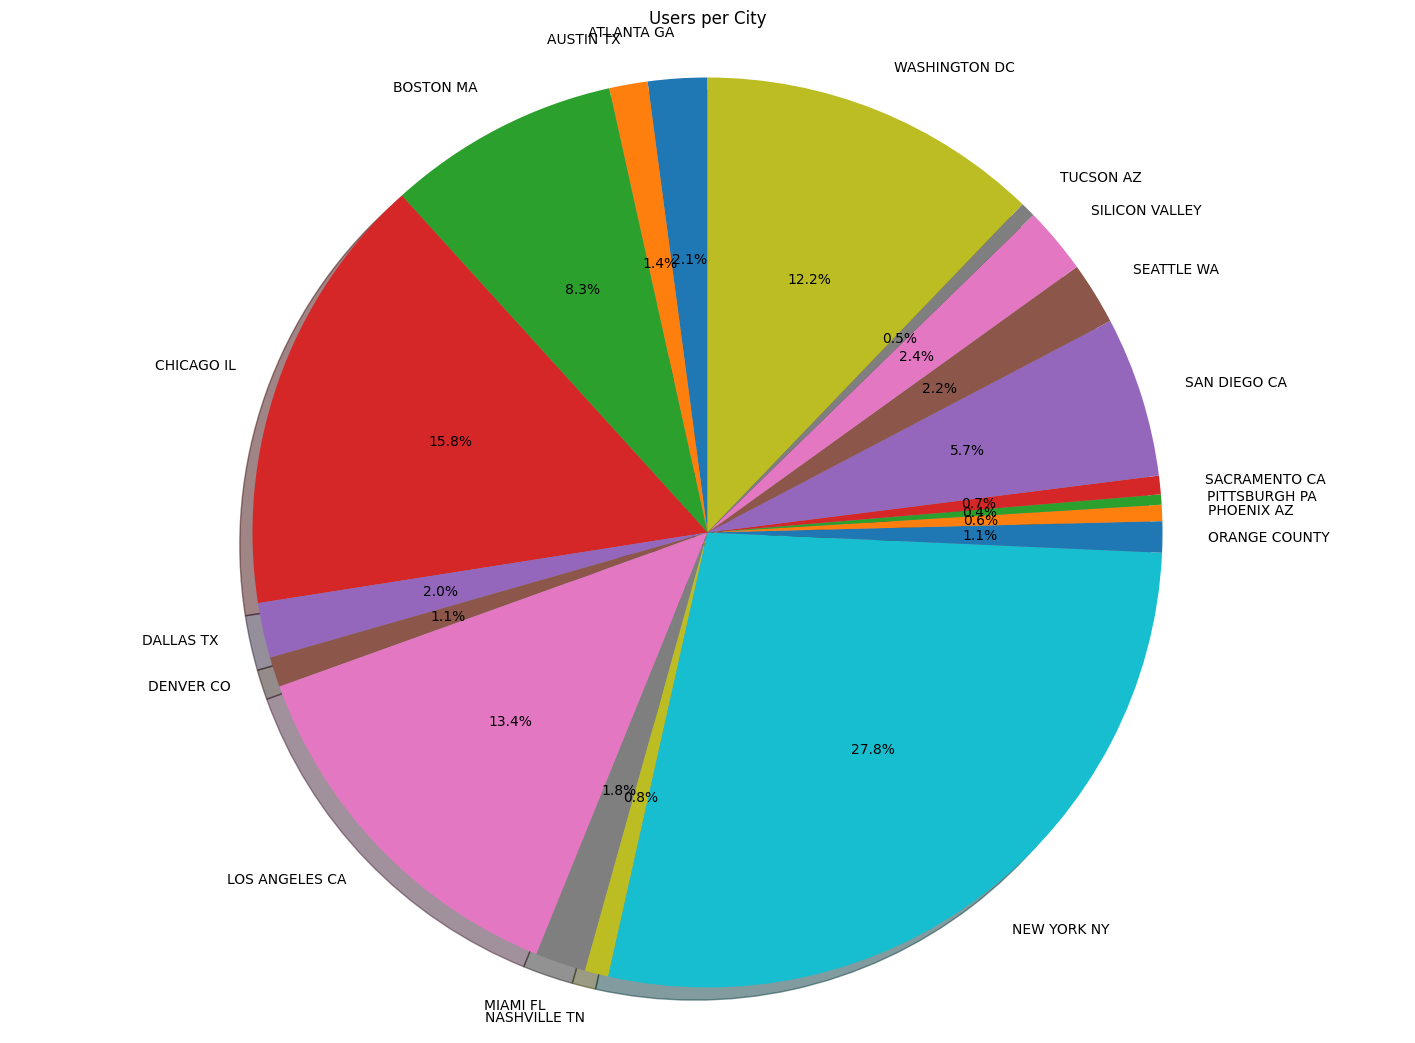

In [ ]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals,labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()


>New York City has the highest Cab users, followed by Chicago ,LA and Washington DC

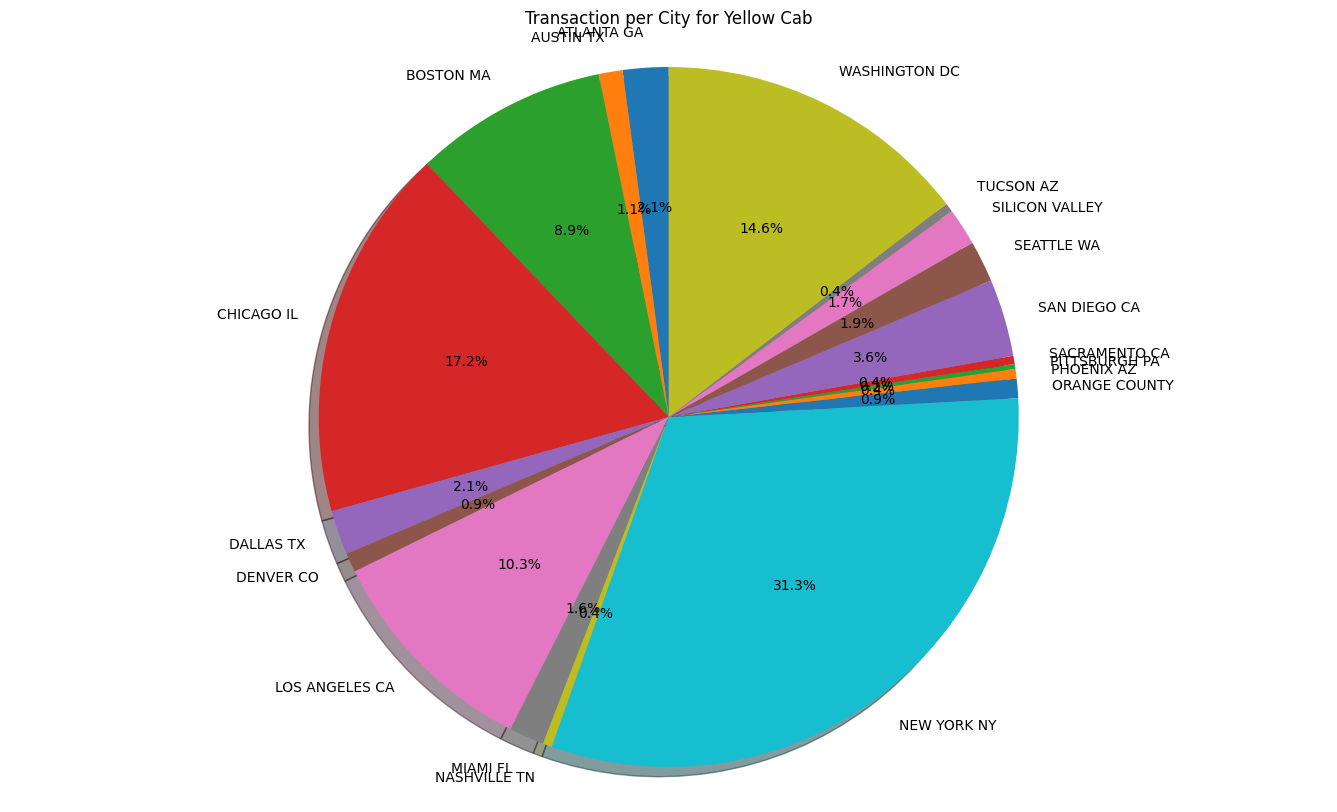

In [ ]:
labs = city_Y.index
vals = city_Y.values
figp, axp = plt.subplots(figsize=(17,10))
axp.pie(vals,labels=labs, autopct='%1.1f%%',shadow=True, startangle=90)
axp.axis('equal')

plt.title('Transaction per City for Yellow Cab')
plt.show()

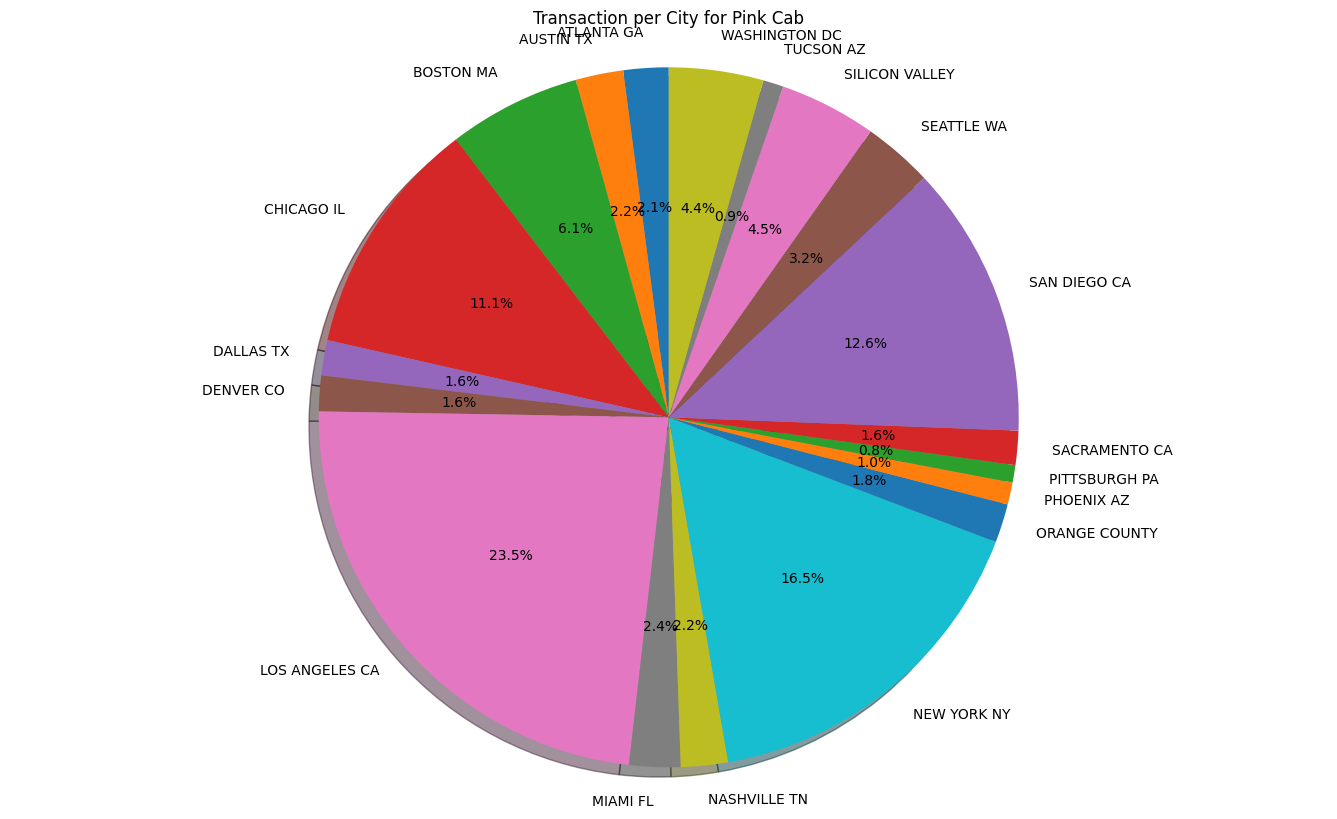

In [ ]:
labs = city_P.index
vals = city_P.values
figp, axp = plt.subplots(figsize=(17,10))
axp.pie(vals,labels=labs, autopct='%1.1f%%',shadow=True, startangle=90)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

>Transaction for Yellow Cab is highest in NYC

>Transaction for Pink Cab is highest in LA

In [ ]:
gender_Y=data[data.Company=='Yellow Cab'].groupby('Gender').apply(lambda x: (x['Price_Charged'] - x['Cost_of_Trip']).sum() / x['Transaction_ID'].nunique())
plt.figure(figsize=(14,7))
gender_Y

Gender
Female    156.305325
Male      163.150948
dtype: float64

<Figure size 1400x700 with 0 Axes>

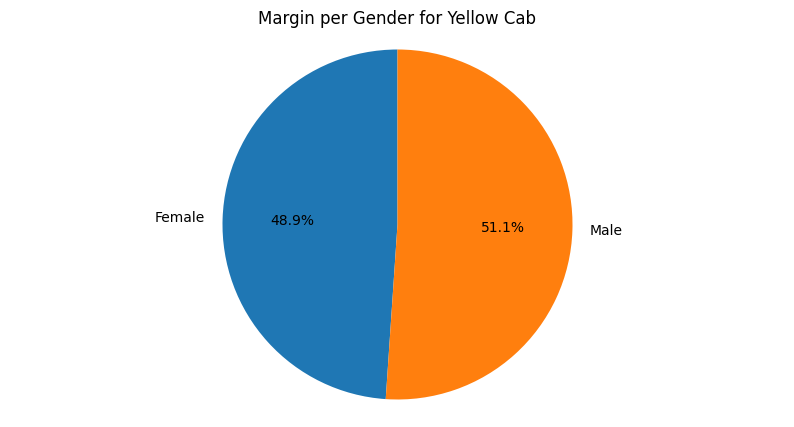

In [ ]:
labs = gender_Y.index
vals = gender_Y.values
figp, axp = plt.subplots(figsize=(10,5))
axp.pie(vals,labels=labs, autopct='%1.1f%%',shadow=False, startangle=90)
axp.axis('equal')

plt.title('Margin per Gender for Yellow Cab')
plt.show()

In [ ]:
gender_P=data[data.Company=='Pink Cab'].groupby('Gender').apply(lambda x: (x['Price_Charged'] - x['Cost_of_Trip']).sum() / x['Transaction_ID'].nunique())
plt.figure(figsize=(14,7))
gender_P

Gender
Female    62.180701
Male      63.026310
dtype: float64

<Figure size 1400x700 with 0 Axes>

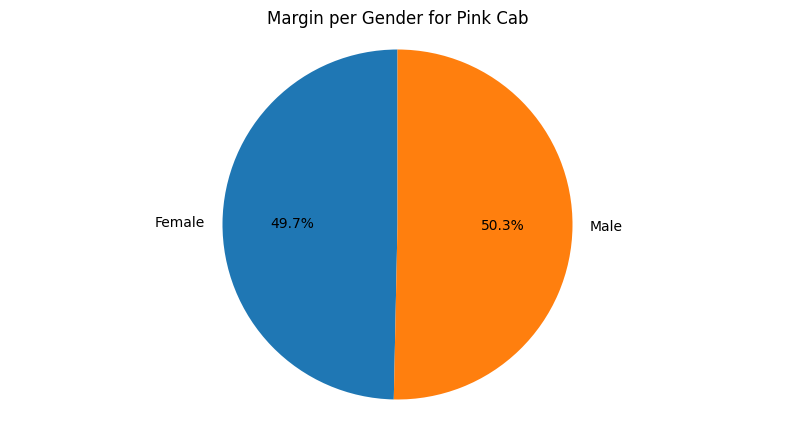

In [ ]:
labs = gender_P.index
vals = gender_P.values
figp, axp = plt.subplots(figsize=(10,5))
axp.pie(vals,labels=labs,autopct='%1.1f%%',shadow=False,startangle=90)
axp.axis('equal')

plt.title('Margin per Gender for Pink Cab')
plt.show()

>Almost simmilar but both of Company get more margins form Male than Female

In [ ]:
gender_cab=data.groupby(['Company','Gender']).Customer_ID.nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

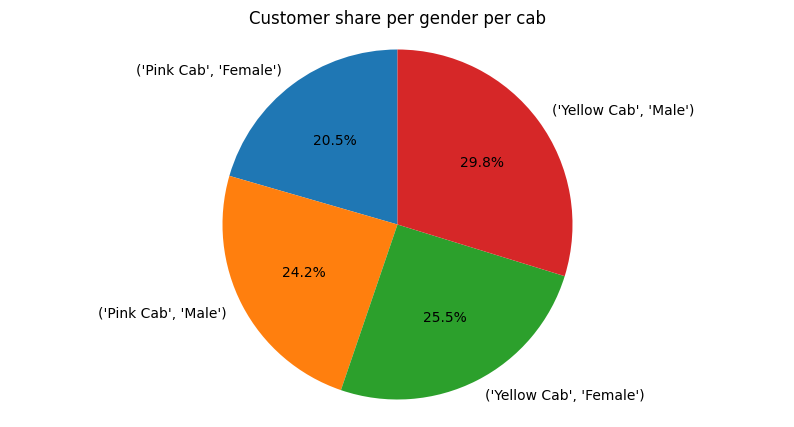

In [ ]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,5))
axp.pie(vals,labels=labs, autopct='%1.1f%%',shadow=False, startangle=90)

axp.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()

>Both Female Customers and Male Customers are use Yellow Cab more than Pink Cab

In [ ]:
data['Margins'] = (data['Price_Charged']-data['Cost_of_Trip'])
data.head()

Transaction_ID  Customer_ID        City   Company  KM_Travelled  \
0        10000011        29290  ATLANTA GA  Pink Cab         30.45   
1        10000012        27703  ATLANTA GA  Pink Cab         28.62   
2        10000013        28712  ATLANTA GA  Pink Cab          9.04   
3        10000014        28020  ATLANTA GA  Pink Cab         33.17   
4        10000015        27182  ATLANTA GA  Pink Cab          8.73   

   Price_Charged  Cost_of_Trip  Month  Year Payment_Mode Gender  Age  Income  \
0         370.95       313.635      1  2016         Card   Male   28   10813   
1         358.52       334.854      1  2016         Card   Male   27    9237   
2         125.20        97.632      1  2016         Cash   Male   53   11242   
3         377.40       351.602      1  2016         Cash   Male   23   23327   
4         114.62        97.776      1  2016         Card   Male   33    8536   

  Population     Users  Margins  
0   814,885    24,701    57.315  
1   814,885    24,701    23.666  
2   814,885    24,701    27.568  
3   814,885    24,701    25.798  
4   814,885    24,701    16.844

In [ ]:
df = data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Margins']]
df.corr()

KM_Travelled  Price_Charged  Cost_of_Trip     Month      Year  \
KM_Travelled       1.000000       0.835753      0.981848 -0.001773 -0.001094   
Price_Charged      0.835753       1.000000      0.859812 -0.059639 -0.036903   
Cost_of_Trip       0.981848       0.859812      1.000000 -0.008309 -0.001766   
Month             -0.001773      -0.059639     -0.008309  1.000000 -0.033169   
Year              -0.001094      -0.036903     -0.001766 -0.033169  1.000000   
Age               -0.000369      -0.003084     -0.000189 -0.002376 -0.000497   
Income            -0.000544       0.003228     -0.000633  0.000585 -0.001679   
Margins            0.462768       0.864154      0.486056 -0.093886 -0.061420   

                    Age    Income   Margins  
KM_Travelled  -0.000369 -0.000544  0.462768  
Price_Charged -0.003084  0.003228  0.864154  
Cost_of_Trip  -0.000189 -0.000633  0.486056  
Month         -0.002376  0.000585 -0.093886  
Year          -0.000497 -0.001679 -0.061420  
Age            1.000000  0.003907 -0.005093  
Income         0.003907  1.000000  0.006148  
Margins       -0.005093  0.006148  1.000000

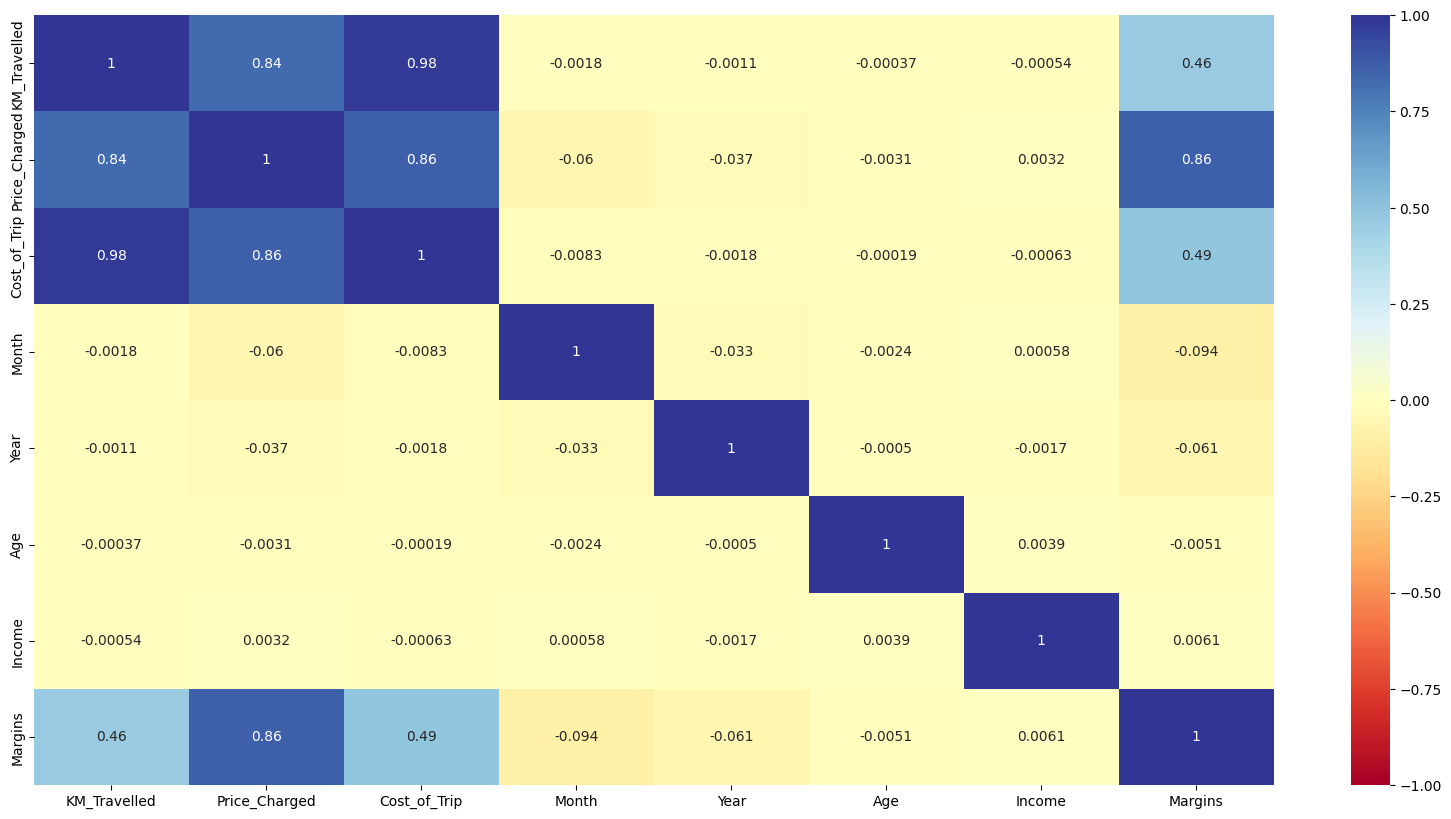

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='RdYlBu')
plt.show()

>Margin and Price_Charged has positive correlation

In [ ]:
city_M = data[data.Month==12].groupby('City').Margins.mean()
city_M

City
ATLANTA GA         96.252930
AUSTIN TX          91.891400
BOSTON MA          62.360750
CHICAGO IL         52.396687
DALLAS TX         109.465216
DENVER CO         111.138893
LOS ANGELES CA     81.752667
MIAMI FL          100.150911
NASHVILLE TN       81.459593
NEW YORK NY       258.421581
ORANGE COUNTY      76.134553
PHOENIX AZ         76.922806
PITTSBURGH PA      57.105846
SACRAMENTO CA      27.119039
SAN DIEGO CA       70.382592
SEATTLE WA         76.515311
SILICON VALLEY    167.087114
TUCSON AZ          84.105100
WASHINGTON DC      62.742899
Name: Margins, dtype: float64

In [ ]:
dtP = data[(data.Company=='Pink Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dtY = data[(data.Company=='Yellow Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
ddP = pd.DataFrame({'Margins_pink':dtP.values,'Transaction_pink':data[data.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})
ddY = pd.DataFrame({'Margins_yellow':dtP.values,'Transaction_yellow':data[data.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

Margins of Pink Cab

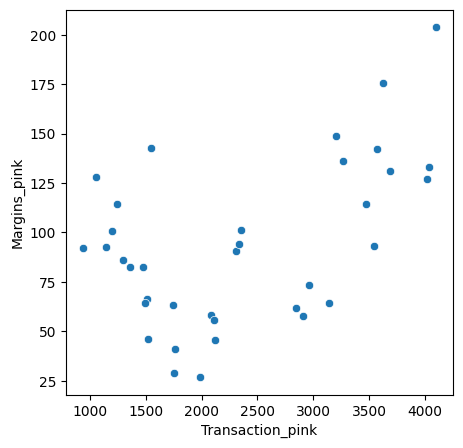

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=ddP.Transaction_pink,y=ddP.Margins_pink)
plt.show()

>Pink Cabs increase their margins with increase of Transaction

Margins of Yellow Cab

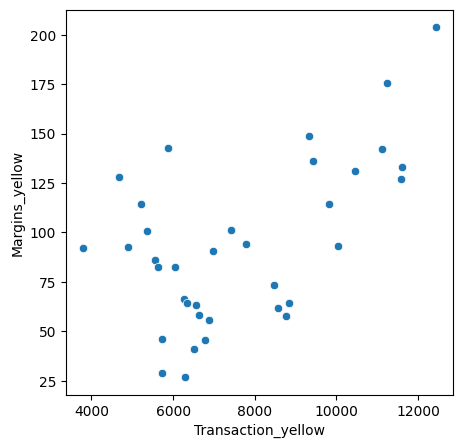

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=ddY.Transaction_yellow,y=ddY.Margins_yellow)
plt.show()

#Hypothesis Testing

Null Hyphothesis: Margin remain the same regarding Gender for both Yellow Cab and Pink Cab

Yellow Cab

In [ ]:
a = data[(data.Gender=='Male') & (data.Company=='Yellow Cab')].groupby('Transaction_ID')['Margins'].mean()
b = data[(data.Gender=='Female') & (data.Company=='Yellow Cab')].groupby('Transaction_ID')['Margins'].mean()
print(a.shape[0], b.shape[0])
from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
  print('Deny null hypothesis')
else:
  print('Accept null hypothesis')

print('P vlaue : ', float(p_value))

158681 116000
Deny null hypothesis
P vlaue :  6.060473042494056e-25


Pink Cab

In [ ]:
a = data[(data.Gender=='Male') & (data.Company=='Pink Cab')].groupby('Transaction_ID')['Margins'].mean()
b = data[(data.Gender=='Female') & (data.Company=='Pink Cab')].groupby('Transaction_ID')['Margins'].mean()
print(a.shape[0], b.shape[0])
from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
  print('Deny null hypothesis')
else:
  print('Accept null hypothesis')

print('P vlaue : ', float(p_value))

47231 37480
Accept null hypothesis
P vlaue :  0.11515305900425798


> Yellow Cab has different Margin between Male and Female customers, which is not in Pink Cab.

Null Hyphothesis: Margin remain the same regarding age for both Yellow Cab and Pink Cab

Yellow Cab

In [ ]:
a = data[(data.Age<=50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('Deny null hypothesis')
else:
    print('Accept null hypothesis')

print('P value is ', p_value)

231480 43201
Deny null hypothesis
P value is  6.4942568177993685e-09


Pink Cab

In [ ]:
a = data[(data.Age<=50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('Deny null hypothesis')
else:
    print('Accept null hypothesis')

print('P value is ', p_value)

71228 13483
Accept null hypothesis
P value is  0.32817487547980695


>Yellow Cab offers discount for old ages(more than 50) which is not in Pink Cab

Null Hypothesis: There is no difference in Margin regarding yo payment method.

Yellow Cab

In [ ]:
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('Deny null hypothesis')
else:
    print('Accept null hypothesis')

print('P value is ', p_value)

Accept null hypothesis
P value is  0.2933060638298729


Pink Cab

In [ ]:
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('Deny null hypothesis')
else:
    print('Accept null hypothesis')

print('P value is ', p_value)

Accept null hypothesis
P value is  0.7900465828793286


>There is no difference in Margin regarding to payment method.

In [ ]:
data.head()

Transaction_ID  Customer_ID        City   Company  KM_Travelled  \
0        10000011        29290  ATLANTA GA  Pink Cab         30.45   
1        10000012        27703  ATLANTA GA  Pink Cab         28.62   
2        10000013        28712  ATLANTA GA  Pink Cab          9.04   
3        10000014        28020  ATLANTA GA  Pink Cab         33.17   
4        10000015        27182  ATLANTA GA  Pink Cab          8.73   

   Price_Charged  Cost_of_Trip  Month  Year Payment_Mode Gender  Age  Income  \
0         370.95       313.635      1  2016         Card   Male   28   10813   
1         358.52       334.854      1  2016         Card   Male   27    9237   
2         125.20        97.632      1  2016         Cash   Male   53   11242   
3         377.40       351.602      1  2016         Cash   Male   23   23327   
4         114.62        97.776      1  2016         Card   Male   33    8536   

  Population     Users  Margins  
0   814,885    24,701    57.315  
1   814,885    24,701    23.666  
2   814,885    24,701    27.568  
3   814,885    24,701    25.798  
4   814,885    24,701    16.844

In [ ]:
data.to_csv('Master_data.csv',index = False)